<a href="https://colab.research.google.com/github/Gorphe/fastai/blob/master/5_Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from fastai.vision.all import *


In [3]:
path = untar_data(URLs.PETS)

In [3]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [4]:
(path/'images').ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/samoyed_159.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_16.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_136.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/newfoundland_196.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_193.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Bengal_95.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_155.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/havanese_80.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/keeshond_195.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_185.jpg')...]

In [5]:
fname=(path/'images').ls()[0]

In [6]:
fname

Path('/root/.fastai/data/oxford-iiit-pet/images/samoyed_159.jpg')

In [7]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['samoyed']

In [5]:
pets = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(seed=42),
    get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
)


In [6]:
dls = pets.dataloaders(path/'images')

checking and debugging a datablock

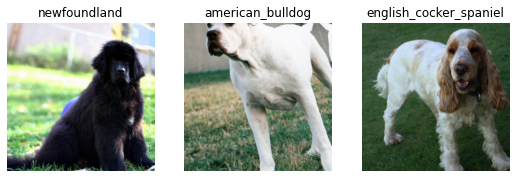

In [10]:
dls.show_batch(nrows=1, ncols=3)

In [11]:
pets.summary(path/'images')

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/american_bulldog_38.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=359x500
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/american_bulldog_38.jpg
    applying partial gives
      american_bulldog
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(12)

Final sample: (PILImage mode=RGB size=359x500, TensorCategory(12))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Set

In [12]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:287: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download

  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.509743,0.312938,0.100812,01:18


epoch,train_loss,valid_loss,error_rate,time
0,0.517960,0.313851,0.100812,01:15
1,0.340679,0.200153,0.070365,01:16


cross entropy loss

In [13]:
x, y = dls.one_batch()

In [14]:
y

TensorCategory([14, 10, 19, 21, 11, 25, 19, 19, 17,  9, 29, 29,  4, 26, 10, 21,
                15, 30, 10, 23, 35, 22, 12, 28, 13,  7,  4, 21, 27, 26, 18,  4,
                23, 26, 33, 18, 24, 28, 25, 31, 29, 25, 14, 30, 24, 26, 11, 33,
                32, 26, 23, 32,  1,  5, 12,  9,  0, 15,  7, 32, 25, 33, 13,  8],
               device='cuda:0')

In [15]:
preds,_ = learn.get_preds(dl=[(x,y)])
preds[0]

TensorBase([1.3981e-06, 1.2505e-05, 6.9717e-06, 1.1115e-06, 6.8092e-07,
            9.4007e-07, 1.2405e-05, 6.5550e-06, 1.2116e-06, 7.3660e-07,
            5.8715e-07, 5.5972e-07, 6.8102e-06, 6.4384e-05, 9.9858e-01,
            7.0923e-04, 5.3041e-06, 1.1451e-07, 1.4659e-04, 4.9973e-06,
            7.2522e-06, 1.2332e-04, 1.2957e-07, 5.3851e-07, 6.4020e-07,
            7.1405e-06, 4.0788e-06, 1.7476e-06, 1.2848e-06, 8.5571e-08,
            2.7536e-04, 8.8584e-07, 1.1894e-06, 1.3156e-06, 5.3442e-06,
            7.4314e-06, 8.4430e-07])

In [16]:
len(preds[0]), preds[0].sum()

(37, TensorBase(1.))

In [ ]:
#plot_function(torch.sigmoid, min=-4, max=4)

In [17]:
acts = torch.randn((6,2))*2
acts

tensor([[-2.7469,  1.2929],
        [-3.3264, -0.6674],
        [-1.2777,  1.2582],
        [ 1.1777,  2.5570],
        [-1.6045, -3.3076],
        [ 2.2148, -2.0914]])

In [18]:
acts.sigmoid()

tensor([[0.0603, 0.7846],
        [0.0347, 0.3391],
        [0.2179, 0.7787],
        [0.7645, 0.9280],
        [0.1674, 0.0353],
        [0.9016, 0.1099]])

In [19]:
(acts[:,0]-acts[:,1]).sigmoid()

tensor([0.0173, 0.0654, 0.0734, 0.2011, 0.8459, 0.9867])

In [20]:
import math
def softmax(x):
  return math.exp(x)/math.exp(x).sum(dim=1, keepdim=True)

In [21]:
sm_acts = torch.softmax(acts, dim=1)
sm_acts

tensor([[0.0173, 0.9827],
        [0.0654, 0.9346],
        [0.0734, 0.9266],
        [0.2011, 0.7989],
        [0.8459, 0.1541],
        [0.9867, 0.0133]])

In [22]:
targ = tensor([0,1,0,1,1,0])

In [23]:
idx = range(6)
sm_acts[idx, targ]

tensor([0.0173, 0.9346, 0.0734, 0.7989, 0.1541, 0.9867])

In [24]:
F.nll_loss(sm_acts, targ, reduction='none')

tensor([-0.0173, -0.9346, -0.0734, -0.7989, -0.1541, -0.9867])

In [25]:
loss_func = nn.CrossEntropyLoss()

In [26]:
loss_func(acts, targ)

tensor(1.4743)

In [27]:
nn.CrossEntropyLoss(reduction='none')(acts, targ)

tensor([4.0573, 0.0677, 2.6122, 0.2245, 1.8704, 0.0134])

Model interpretation

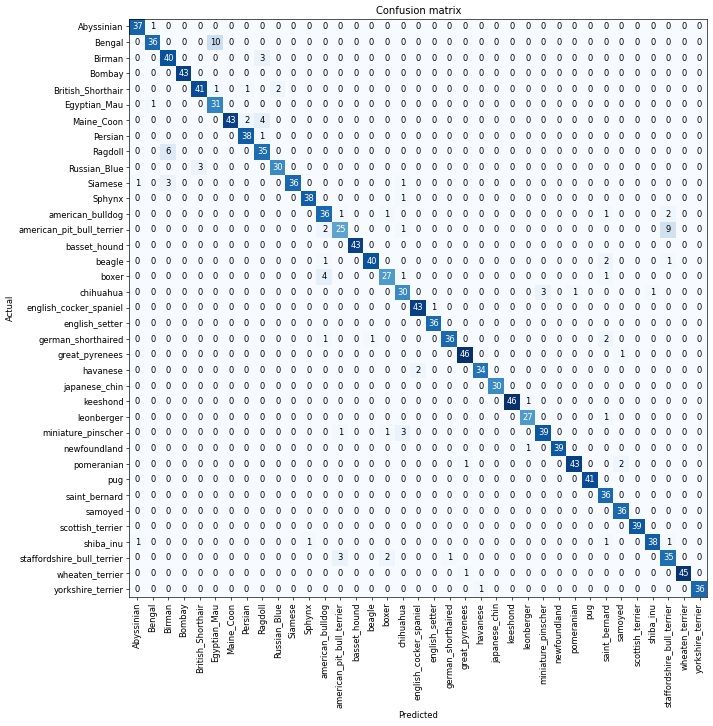

In [28]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [29]:
interp.most_confused(min_val=5)

[('Bengal', 'Egyptian_Mau', 10),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 9),
 ('Ragdoll', 'Birman', 6)]

Improving our model

In [7]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1, base_lr=0.1)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:287: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download

  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,2.573099,4.337493,0.490528,01:08


epoch,train_loss,valid_loss,error_rate,time
0,3.715311,2.038796,0.579161,01:08


In [8]:
learn.fine_tune??

In [10]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3,3e-3)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:287: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.154569,0.284448,0.095399,01:07
1,0.531802,0.254822,0.082544,01:20
2,0.317131,0.187263,0.061570,01:06


In [11]:
learn.unfreeze()

SuggestedLRs(valley=7.585775892948732e-05)

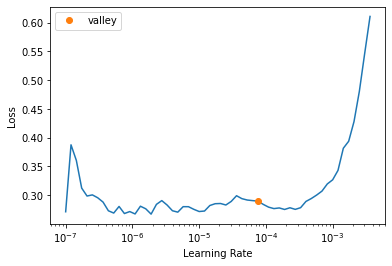

In [12]:
learn.lr_find()

In [13]:
learn.fit_one_cycle(6,lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.246161,0.182378,0.060893,01:09
1,0.253696,0.175508,0.056834,01:09
2,0.230437,0.169437,0.054804,01:09
3,0.210467,0.163209,0.051421,01:10
4,0.179949,0.164847,0.050068,01:09
5,0.185223,0.164653,0.048038,01:09


discriminative learning rates

In [14]:
learn = cnn_learner(dls, resnet34, metrics= error_rate)
learn.fit_one_cycle(3,3e-3)
learn.unfreeze()
learn.fit_one_cycle(12,lr_max=slice(1e-6, 1e-4))

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:287: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.170874,0.299931,0.090663,01:09
1,0.532890,0.216565,0.065629,01:08
2,0.335733,0.201533,0.064276,01:08


epoch,train_loss,valid_loss,error_rate,time
0,0.277591,0.195253,0.063599,01:09
1,0.254036,0.185323,0.064953,01:09
2,0.241671,0.190082,0.058863,01:08
3,0.208031,0.182209,0.056834,01:12
4,0.204668,0.178892,0.053451,01:10
5,0.178865,0.176881,0.056834,01:09
6,0.161230,0.175556,0.055480,01:09
7,0.148812,0.171908,0.054804,01:08
8,0.138524,0.172510,0.054127,01:09
9,0.129296,0.170703,0.058187,01:09


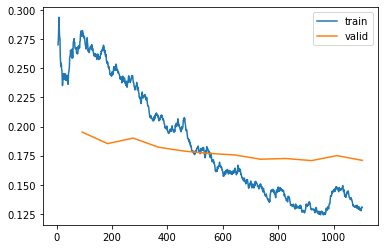

In [15]:
learn.recorder.plot_loss()